# Laboratory 22: Classification, Logistic Regression, and Discrete GOF Metrics


## Full name: 
## R#: 
## HEX: 
## Title of the notebook
## Date: 

![](https://d2slcw3kip6qmk.cloudfront.net/marketing/blog/2018Q2/critical-elements-for-decision-making/operations-webinar-recap-header@2x.png) <br>


## For the last few sessions we have talked about simple linear regression ... <br>

![](https://biol609.github.io/lectures/images/03/simple_regression.jpeg) <br>

### We discussed ...
- __The theory and implementation of simple linear regression in Python__<br>
- __OLS and MLE methods for estimation of slope and intercept coefficients__  <br>    
- __Errors (Noise, Variance, Bias) and their impacts on model's performance__ <br>
- __Confidence and prediction intervals__
- __And Multiple Linear Regressions__
    
![](https://memegenerator.net/img/instances/73408711.jpg)

- __What if we want to predict a discrete variable?__

    The general idea behind our efforts was to use a set of observed events (samples) to capture the relationship between one or more predictor (AKA input, indipendent) variables and an output (AKA response, dependent) variable. The nature of the dependent variables differentiates *__regression__* and *__classification__* problems. 
    ![](https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png)

    
    Regression problems have continuous and usually unbounded outputs. An example is when you’re estimating the salary as a function of experience and education level. Or all the examples we have covered so far! 
    
    On the other hand, classification problems have discrete and finite outputs called classes or categories. For example, predicting if an employee is going to be promoted or not (true or false) is a classification problem. There are two main types of classification problems:

    - Binary or binomial classification: 
    
    exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)
    
    - Multiclass or multinomial classification:
    
    three or more classes of the outputs to choose from


- __When Do We Need Classification?__
    
    We can apply classification in many fields of science and technology. For example, text classification algorithms are used to separate legitimate and spam emails, as well as positive and negative comments. Other examples involve medical applications, biological classification, credit scoring, and more.
    
## Logistic Regression

- __What is logistic regression?__
    Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for users to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems. 
    
    ![](https://www.biolegend.com/Files/Images/BioLegend/blog/122118correlationblog/LinearRegresssion.jpg) 
    
    Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence. Logistic regression can be considered a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function. HOW?
    Remember the general format of the multiple linear regression model: ![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image1_ga8gze.png) Where, y is dependent variable and x1, x2 ... and Xn are explanatory variables. This was, as you know by now, a linear function. There is another famous function known as the *__Sigmoid Function__*, also called *__logistic function__*. Here is the equation for the Sigmoid function: ![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image2_kwxquj.png) This image shows the sigmoid function (or S-shaped curve) of some variable 𝑥: ![](https://files.realpython.com/media/log-reg-1.e32deaa7cbac.png) As you see, The sigmoid function has values very close to either 0 or 1 across most of its domain. It can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. This fact makes it suitable for application in classification methods since we are dealing with two discrete classes (labels, categories, ...). If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. This cutoff value (threshold) is not always fixed at 0.5. If we apply the Sigmoid function on linear regression: ![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image3_qldafx.png) Notice the difference between linear regression and logistic regression: ![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png) 
    logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. 
    
    Let's work on an example in Python! <br>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQS4dpT6isEOjJZ2WAahxwOHvpAwYq6Khy4TQ&usqp=CAU) <br>


### Example 1: Diagnosing Diabetes <br>

![](https://res.cloudinary.com/grohealth/image/upload/c_fill,f_auto,fl_lossy,h_650,q_auto,w_1085/v1581695681/DCUK/Content/causes-of-diabetes.png) <br>



#### The "diabetes.csv" dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 
*Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*
#### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 

|Columns|Info.|
|---:|---:|
|Pregnancies |Number of times pregnant|
|Glucose |Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|BloodPressure |Diastolic blood pressure (mm Hg)|
|SkinThickness |Triceps skin fold thickness (mm)|
|Insulin |2-Hour serum insulin (mu U/ml)|
|BMI |Body mass index (weight in kg/(height in m)^2)|
|Diabetes pedigree |Diabetes pedigree function| 
|Age |Age (years)|
|Outcome |Class variable (0 or 1) 268 of 768 are 1, the others are 0|


#### Let's see if we can build a logistic regression model to accurately predict whether or not the patients in the dataset have diabetes or not?
*Acknowledgements:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

In [2]:
# Import the dataset:
data = pd.read_csv("diabetes.csv")
data.rename(columns = {'Pregnancies':'pregnant', 'Glucose':'glucose','BloodPressure':'bp','SkinThickness':'skin',
                       'Insulin	':'Insulin','BMI':'bmi','DiabetesPedigreeFunction':'pedigree','Age':'age', 
                              'Outcome':'label'}, inplace = True) 
data.head()

,pregnant,glucose,bp,skin,Insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,pregnant,glucose,bp,skin,Insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


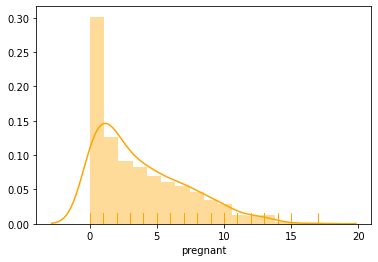

In [4]:
#Check some histograms
sns.distplot(data['pregnant'], kde = True, rug= True, color ='orange') 

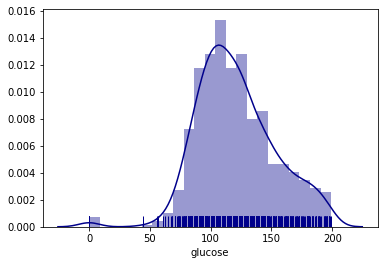

In [5]:
sns.distplot(data['glucose'], kde = True, rug= True, color ='darkblue') 

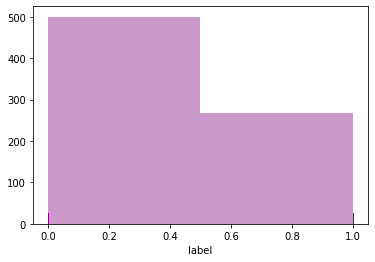

In [6]:
sns.distplot(data['label'], kde = False, rug= True, color ='purple', bins=2) 

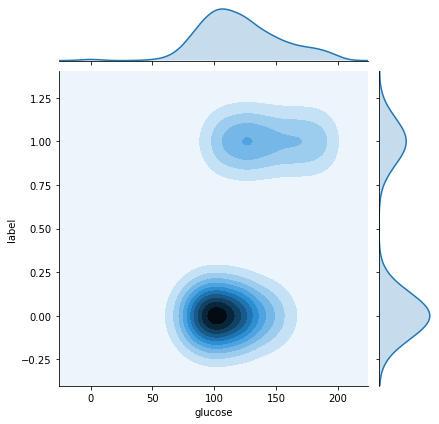

In [24]:
sns.jointplot(x ='glucose', y ='label', data = data, kind ='kde')

#### Selecting Feature: Here, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables or predictors).

In [8]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'Insulin', 'bmi', 'pedigree', 'age']
X = data[feature_cols] # Features
y = data.label # Target variable

#### Splitting Data: To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Let's split dataset by using function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly. Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing:

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Model Development and Prediction: First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function. Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [32]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


![](https://miro.medium.com/max/1200/1*PM4dqcAe6N7kWRpXKwgWag.png)
- __How to assess the performance of logistic regression?__

    Binary classification has four possible types of results:

    - True negatives: correctly predicted negatives (zeros)
    - True positives: correctly predicted positives (ones)
    - False negatives: incorrectly predicted negatives (zeros)
    - False positives: incorrectly predicted positives (ones)
    
   We usually evaluate the performance of a classifier by comparing the actual and predicted outputsand counting the correct and incorrect predictions. A confusion matrix is a table that is used to evaluate the performance of a classification model. 
    ![](https://image.jimcdn.com/app/cms/image/transf/dimension=699x10000:format=png/path/s8ff3310143614e07/image/iab2d53abc26a2bc7/version/1549760945/image.png) 

    Some indicators of binary classifiers include the following:

    - The most straightforward indicator of classification accuracy is the ratio of the number of correct predictions to the total number of predictions (or observations). 
    - The positive predictive value is the ratio of the number of true positives to the sum of the numbers of true and false positives.
    - The negative predictive value is the ratio of the number of true negatives to the sum of the numbers of true and false negatives.
    - The sensitivity (also known as recall or true positive rate) is the ratio of the number of true positives to the number of actual positives.
    - The precision score quantifies the ability of a classifier to not label a negative example as positive. The precision score can be interpreted as the probability that a positive prediction made by the classifier is positive.
    - The specificity (or true negative rate) is the ratio of the number of true negatives to the number of actual negatives. 
    ![](https://miro.medium.com/max/936/0*R7idSv1bja3CLC8s.png) 
    
    The extent of importance of recall and precision depends on the problem. Achieving a high recall is more important than getting a high precision in cases like when we would like to detect as many heart patients as possible. For some other models, like classifying whether a bank customer is a loan defaulter or not, it is desirable to have a high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters. 
    There are also a lot of situations where both precision and recall are equally important. Then we would aim for not only a high recall but a high precision as well. In such cases, we use something called F1-score. F1-score is the Harmonic mean of the Precision and Recall: ![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/f1score-300x73.png) This is easier to work with since now, instead of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well.
    ![](https://memegenerator.net/img/instances/85090403.jpg)

#### Model Evaluation using Confusion Matrix: A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [11]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix

array([[119,  26],
       [ 11,  36]], dtype=int64)

#### Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.
#### Visualizing Confusion Matrix using Heatmap: Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5, 257.44, 'Actual label')

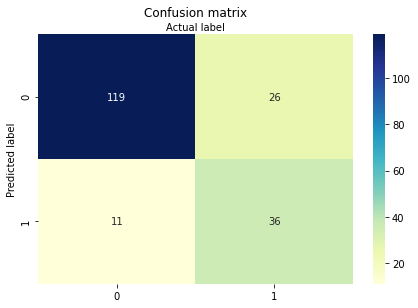

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

#### Confusion Matrix Evaluation Metrics: Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226
F1-score: 0.6605504587155964


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       130
           1       0.77      0.58      0.66        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.81      0.80       192



![](https://memegenerator.net/img/instances/85090569.jpg)

![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>

*This notebook was inspired by several blogposts including:* 

- __"Logistic Regression in Python"__ by __Mirko Stojiljković__ available at* https://realpython.com/logistic-regression-python/ <br>
- __"Understanding Logistic Regression in Python"__ by __Avinash Navlani__ available at* https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python <br>
- __"Understanding Logistic Regression with Python: Practical Guide 1"__ by __Mayank Tripathi__ available at* https://datascience.foundation/sciencewhitepaper/understanding-logistic-regression-with-python-practical-guide-1 <br>
- __"Understanding Data Science Classification Metrics in Scikit-Learn in Python"__ by __Andrew Long__  available at* https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019 <br>


*Here are some great reads on these topics:* 
- __"Example of Logistic Regression in Python"__ available at* https://datatofish.com/logistic-regression-python/ <br>
- __"Building A Logistic Regression in Python, Step by Step"__ by __Susan Li__ available at* https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 <br>
- __"How To Perform Logistic Regression In Python?"__ by __Mohammad Waseem__ available at* https://www.edureka.co/blog/logistic-regression-in-python/ <br>
- __"Logistic Regression in Python Using Scikit-learn"__ by __Dhiraj K__ available at* https://heartbeat.fritz.ai/logistic-regression-in-python-using-scikit-learn-d34e882eebb1 <br>
- __"ML | Logistic Regression using Python"__ available at* https://www.geeksforgeeks.org/ml-logistic-regression-using-python/ <br>

*Here are some great videos on these topics:* 
- __"StatQuest: Logistic Regression"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe <br>
- __"Linear Regression vs Logistic Regression | Data Science Training | Edureka"__ by __edureka!__ available at* https://www.youtube.com/watch?v=OCwZyYH14uw <br>
- __"Logistic Regression in Python | Logistic Regression Example | Machine Learning Algorithms | Edureka"__ by __edureka!__ available at* https://www.youtube.com/watch?v=VCJdg7YBbAQ <br>
- __"How to evaluate a classifier in scikit-learn"__ by __Data School__ available at* https://www.youtube.com/watch?v=85dtiMz9tSo <br>
- __"How to evaluate a classifier in scikit-learn"__ by __Data School__ available at* https://www.youtube.com/watch?v=85dtiMz9tSo <br>

### Exercise 1: Wine Quality <br>

![](https://imgur.com/Iwi7vYH.png) <br>




#### The "winequality.csv" dataset is provided with information related to red vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. Follow the steps and answer the question. *Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).* 


#### The datasets consists of several Input variables (based on physicochemical tests). 

|Columns|Info.|
|---:|---:|
|fixed acidity |most acids involved with wine or fixed or nonvolatile (do not evaporate readily)|
|volatile acidity |the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste|
|citric acid |found in small quantities, citric acid can add 'freshness' and flavor to wines|
|residual sugar |the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter|
|chlorides |the amount of salt in the wine|
|free sulfur dioxide |the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion|
|total sulfur dioxide |amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine| 
|density |the density of water is close to that of water depending on the percent alcohol and sugar content|
|pH |describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4|
|sulphates |a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial|
|alcohol |the percent alcohol content of the wine|
|quality (score between 0 and 10) |output variable (based on sensory data, score between 0 and 10)|


#### Follow the steps and answer the following questions:


- Step1: Read the "winequality.csv" file as a dataframe. Change the column names to **('acidity_f','acidity_v','ca','rsugar','chlorides','sulfurd_f','sulfurd_t','density','ph','sulphates','alcohol','qualityscore')**. Explore the dataframe and in a markdown cell breifly describe the different variables in your own words. <br>

- Step2: Use logistic regression and ('acidity_f', 'ca', 'chlorides', 'sulfurd_t', 'ph', 'alcohol') as predictors to predict the quality of wine. Use a 70/30 split for training and testing. Then, get the confusion matrix and use classification_report to describe the performance of your model. Also, get a heatmap and visually assess the predictions of your model. Explain the result of this analysis in a markdown cell.

- Step3: Use logistic regression and ('acidity_v', 'rsugar', 'sulfurd_f', 'density', 'sulphates') as predictors to predict the quality of wine. Use a 70/30 split for training and testing. Then, get the confusion matrix and use classification_report to describe the performance of your model. Also, get a heatmap and visually assess the predictions of your model. Explain the result of this analysis in a markdown cell.

- Step4: Use logistic regression and all the predictors to predict the quality of wine. Use a 70/30 split for training and testing. Then, get the confusion matrix and use classification_report to describe the performance of your model. Also, get a heatmap and visually assess the predictions of your model. Explain the result of this analysis in a markdown cell.

- Step5: Which model provides better results? what are some pros and cons associated with your winning model? 


*Acknowledgements:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*


![](https://cdn.shopify.com/s/files/1/0151/0741/products/280c84e72e3adfeeb04b9d50bebcc299_480x480.jpg?v=1578648772) <br>


In [15]:
#Step1:
winedf = pd.read_csv("winequality.csv")
winedf.rename(columns = {'fixed_acidity':'acidity_f', 'volatile_acidity':'acidity_v','citric_acid':'ca','residual_sugar':'rsugar',
                       'chlorides':'chlorides','free_sulfur_dioxide':'sulfurd_f','total_sulfur_dioxide':'sulfurd_t','density':'density', 
                              'pH':'ph','sulphates':'sulphates','alcohol':'alcohol','quality (score _0to10)':'qualityscore'}, inplace = True) 
winedf.head()

,acidity_f,acidity_v,ca,rsugar,chlorides,sulfurd_f,sulfurd_t,density,ph,sulphates,alcohol,qualityscore
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
#Step2:
#split dataset in features and target variable
feature1_cols = ['acidity_f', 'ca', 'chlorides', 'sulfurd_t', 'ph', 'alcohol']
X1 = winedf[feature1_cols] # Features
y1 = winedf.qualityscore # Target variable

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=0)

#Build the model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg1 = LogisticRegression()

# fit the model with data
logreg1.fit(X1_train,y1_train)

#
y1_pred=logreg1.predict(X1_test)

C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  2   9 156  79   2   0]
 [  1   6  51 118  36   4]
 [  0   0   1   7   7   1]
 [  0   0   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.63      0.75      0.68       208
           6       0.55      0.58      0.56       204
           7       0.44      0.16      0.23        45
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.27      0.25      0.25       480
weighted avg       0.55      0.59      0.56       480



C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 257.44, 'Actual label')

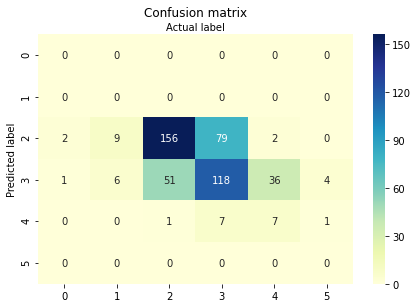

In [17]:
# import the metrics class
from sklearn import metrics
cnf1_matrix = metrics.confusion_matrix(y1_pred, y1_test)
print(cnf1_matrix)
# get the metrics
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

#visualize
class_names=[1,2,3,4,5,6,7,8,9,10] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf1_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

In [18]:
#Step3:
#split dataset in features and target variable
feature2_cols = ['acidity_v', 'rsugar', 'sulfurd_f', 'density', 'sulphates']
X2 = winedf[feature2_cols] # Features
y2 = winedf.qualityscore # Target variable

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=0)

#Build the model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg2 = LogisticRegression()

# fit the model with data
logreg2.fit(X2_train,y2_train)

#
y2_pred=logreg2.predict(X2_test)

C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3  11 151  96  14   2]
 [  0   3  57 106  31   2]
 [  0   1   0   2   0   1]
 [  0   0   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.55      0.73      0.62       208
           6       0.53      0.52      0.53       204
           7       0.00      0.00      0.00        45
           8       0.00      0.00      0.00         5

    accuracy                           0.54       480
   macro avg       0.18      0.21      0.19       480
weighted avg       0.46      0.54      0.49       480



C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 257.44, 'Actual label')

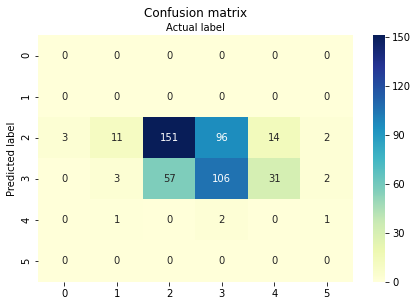

In [19]:
# import the metrics class
from sklearn import metrics
cnf2_matrix = metrics.confusion_matrix(y2_pred, y2_test)
print(cnf2_matrix)
# get the metrics
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_pred))

#visualize
class_names=[1,2,3,4,5,6,7,8,9,10] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf2_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

In [21]:
#Step4:
#split dataset in features and target variable
feature3_cols = ['acidity_f', 'ca', 'chlorides', 'sulfurd_t', 'ph', 'alcohol','acidity_v', 'rsugar', 'sulfurd_f', 'density', 'sulphates']
X3 = winedf[feature3_cols] # Features
y3 = winedf.qualityscore # Target variable

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.3,random_state=0)

#Build the model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg3 = LogisticRegression()

# fit the model with data
logreg3.fit(X3_train,y3_train)

#
y3_pred=logreg3.predict(X3_test)

C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3   9 161  64   3   0]
 [  0   6  46 131  32   3]
 [  0   0   1   9  10   2]
 [  0   0   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.67      0.77      0.72       208
           6       0.60      0.64      0.62       204
           7       0.45      0.22      0.30        45
           8       0.00      0.00      0.00         5

    accuracy                           0.63       480
   macro avg       0.29      0.27      0.27       480
weighted avg       0.59      0.63      0.60       480



C:\Users\Farha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 257.44, 'Actual label')

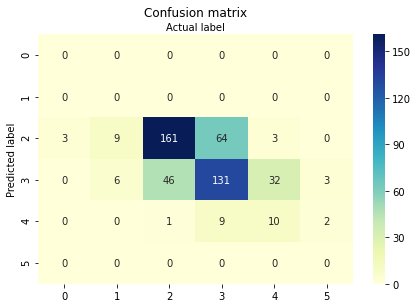

In [22]:
# import the metrics class
from sklearn import metrics
cnf3_matrix = metrics.confusion_matrix(y3_pred, y3_test)
print(cnf3_matrix)
# get the metrics
from sklearn.metrics import classification_report
print(classification_report(y3_test, y3_pred))

#visualize
class_names=[1,2,3,4,5,6,7,8,9,10] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf3_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

In [ ]:
#Step5:

![](https://i.pinimg.com/originals/ad/65/d1/ad65d1c714f1e7abce9fe459c1d18d2d.jpg) <br>
